In [3]:
# # Core libraries
# import time
# import pandas as pd

# # Web scraping tools
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# from webdriver_manager.chrome import ChromeDriverManager


In [4]:
# # Initialize browser options
# chrome_opts = Options()
# chrome_opts.add_argument("--start-maximized")

# # Set up WebDriver
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_opts)


In [5]:
# # Product categories and corresponding URLs from Croma website
# product_urls = {
#     "Smartphones": "https://www.croma.com/mobiles-smartphones/c/1",
#     "Laptops": "https://www.croma.com/laptops/laptops/c/1111",
#     "TVs": "https://www.croma.com/televisions/c/63",
#     "Fridges": "https://www.croma.com/home-appliances/refrigerators/c/5",
#     "ACs": "https://www.croma.com/home-appliances/air-conditioners/c/3",
#     "Washing Machines": "https://www.croma.com/home-appliances/washing-machines/c/4"
# }


In [1]:
# Core libraries
import time
import pandas as pd

# Web scraping tools
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# Initialize browser options
chrome_opts = Options()
chrome_opts.add_argument("--start-maximized")

# Set up WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_opts)

# Product categories and corresponding URLs from Croma website
product_urls = {
    "Smartphones": "https://www.croma.com/mobiles-smartphones/c/1",
    "Laptops": "https://www.croma.com/laptops/laptops/c/1111",
    "TVs": "https://www.croma.com/televisions/c/63",
    "Fridges": "https://www.croma.com/home-appliances/refrigerators/c/5",
    "ACs": "https://www.croma.com/home-appliances/air-conditioners/c/3",
    "Washing Machines": "https://www.croma.com/home-appliances/washing-machines/c/4"
}

# List to collect scraped data
collected_data = []

# Loop through each product category
for group, page_url in product_urls.items():
    print(f"\n📦 Extracting data from: {group}")
    
    driver.get(page_url)
    time.sleep(4)

    # Infinite scroll loop to load all products
    prev_count = 0
    scroll_attempts = 0

    while True:
        # Scroll down step-by-step
        driver.execute_script("window.scrollBy(0, 1000);")
        time.sleep(2)

        # Scroll to bottom and pause
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)

        # Get all product elements
        items = driver.find_elements(By.CSS_SELECTOR, "li.product-item")
        curr_count = len(items)
        print(f"🔄 Scroll {scroll_attempts + 1} → Found {curr_count} products in {group}")

        # Break if no new items are loaded
        if curr_count == prev_count:
            print(f"✅ No new products after scroll {scroll_attempts + 1}. Ending scroll.")
            break

        prev_count = curr_count
        scroll_attempts += 1

        if scroll_attempts >= 30:  # safety limit
            print("⚠️ Max scroll attempts reached. Moving to next category.")
            break

    # Extract info from loaded products
    for item in items:
        try:
            name = item.find_element(By.CSS_SELECTOR, "h3.product-title").text
        except:
            name = "Unavailable"

        try:
            price_tag = item.find_element(By.CSS_SELECTOR, "span.new-price")
            price_text = price_tag.text
        except:
            try:
                price_text = item.find_element(By.CSS_SELECTOR, "span.amount").text
            except:
                price_text = "Unavailable"

        try:
            product_link = item.find_element(By.TAG_NAME, "a").get_attribute("href")
        except:
            product_link = "Unavailable"

        collected_data.append({
            "Category": group,
            "Product": name,
            "Price": price_text,
            "URL": product_link
        })

# Close the browser
driver.quit()
print("✅ Web scraping completed.")

# Convert to DataFrame and save as raw CSV (no cleaning)
pd.DataFrame(collected_data).to_csv("croma_raw_products.csv", index=False)
print("✅ Raw data saved to 'croma_raw_products.csv'")



📦 Extracting data from: Smartphones
🔄 Scroll 1 → Found 21 products in Smartphones
🔄 Scroll 2 → Found 21 products in Smartphones
✅ No new products after scroll 2. Ending scroll.

📦 Extracting data from: Laptops
🔄 Scroll 1 → Found 1 products in Laptops
🔄 Scroll 2 → Found 1 products in Laptops
✅ No new products after scroll 2. Ending scroll.

📦 Extracting data from: TVs
🔄 Scroll 1 → Found 6 products in TVs
🔄 Scroll 2 → Found 6 products in TVs
✅ No new products after scroll 2. Ending scroll.

📦 Extracting data from: Fridges
🔄 Scroll 1 → Found 21 products in Fridges
🔄 Scroll 2 → Found 21 products in Fridges
✅ No new products after scroll 2. Ending scroll.

📦 Extracting data from: ACs
🔄 Scroll 1 → Found 21 products in ACs
🔄 Scroll 2 → Found 21 products in ACs
✅ No new products after scroll 2. Ending scroll.

📦 Extracting data from: Washing Machines
🔄 Scroll 1 → Found 1 products in Washing Machines
🔄 Scroll 2 → Found 1 products in Washing Machines
✅ No new products after scroll 2. Ending scr

In [7]:
# driver.quit()
# print("✅ Web scraping completed.")

In [12]:
# # Convert to DataFrame
# croma_df = pd.DataFrame(collected_data)

# # Save raw data
# croma_df.to_csv("croma_raw_products.csv", index=False)
# croma_df.head()

In [14]:
# # Convert to DataFrame
# croma_df = pd.DataFrame(collected_data)

# # Save raw data
# croma_df.to_csv("croma_raw_products.csv", index=False)
# croma_df.head()


In [20]:
import pandas as pd

# Load the saved raw CSV
croma_df = pd.read_csv("croma_raw_products.csv")

# Show top 10 rows
print(croma_df.head(10))


      Category                                            Product    Price  \
0  Smartphones        vivo Y29 5G (6GB RAM, 128GB, Diamond Black)  ₹15,499   
1  Smartphones  noise ColorFit Victor Smartwatch with Bluetoot...     ₹999   
2  Smartphones         vivo Y29 5G (4GB RAM, 128GB, Glacier Blue)  ₹13,999   
3  Smartphones        vivo Y29 5G (4GB RAM, 128GB, Diamond Black)  ₹13,999   
4  Smartphones         vivo Y29 5G (6GB RAM, 128GB, Glacier Blue)  ₹15,499   
5  Smartphones                      Apple iPhone 15 (256GB, Blue)  ₹73,590   
6  Smartphones                     Apple iPhone 15 (256GB, Black)  ₹73,590   
7  Smartphones  noise Twist Go Smartwatch with Bluetooth Calli...   ₹1,399   
8  Smartphones           Apple iPhone 13 (128GB, Starlight White)  ₹45,790   
9  Smartphones                  Apple iPhone 13 (128GB, Midnight)  ₹45,790   

                                                 URL  
0  https://www.croma.com/vivo-y29-5g-6gb-ram-128g...  
1  https://www.croma.com/noise-

In [22]:
# Remove missing/invalid rows
clean_df = croma_df[
    (croma_df['Product'] != 'Unavailable') &
    (croma_df['Price'] != 'Unavailable') &
    (croma_df['URL'] != 'Unavailable')
].copy()

# Clean price values
clean_df['Price'] = clean_df['Price'].str.replace("₹", "", regex=False)
clean_df['Price'] = clean_df['Price'].str.replace(",", "", regex=False)
clean_df['Price'] = clean_df['Price'].astype(int)

# Save cleaned version
clean_df.to_csv("croma_cleaned_products.csv", index=False)
clean_df.head()


,Category,Product,Price,URL
0,Smartphones,"vivo Y29 5G (6GB RAM, 128GB, Diamond Black)",15499,https://www.croma.com/vivo-y29-5g-6gb-ram-128g...
1,Smartphones,noise ColorFit Victor Smartwatch with Bluetoot...,999,https://www.croma.com/noise-colorfit-victor-sm...
2,Smartphones,"vivo Y29 5G (4GB RAM, 128GB, Glacier Blue)",13999,https://www.croma.com/vivo-y29-5g-4gb-ram-128g...
3,Smartphones,"vivo Y29 5G (4GB RAM, 128GB, Diamond Black)",13999,https://www.croma.com/vivo-y29-5g-4gb-ram-128g...
4,Smartphones,"vivo Y29 5G (6GB RAM, 128GB, Glacier Blue)",15499,https://www.croma.com/vivo-y29-5g-6gb-ram-128g...


In [24]:
# Check total rows and structure
print("📊 Summary Info:")
print(clean_df.info())

# Count by category
clean_df['Category'].value_counts()


📊 Summary Info:
<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 69
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  68 non-null     object
 1   Product   68 non-null     object
 2   Price     68 non-null     int32 
 3   URL       68 non-null     object
dtypes: int32(1), object(3)
memory usage: 2.4+ KB
None


Category
Smartphones    21
Fridges        21
ACs            21
TVs             5
Name: count, dtype: int64

In [26]:
# Grouped average
avg_price = clean_df.groupby('Category')['Price'].mean().sort_values(ascending=False)
avg_price


Category
ACs            82682.714286
TVs            39991.800000
Smartphones    30309.428571
Fridges        17048.380952
Name: Price, dtype: float64

In [28]:
# Find max priced product per category
highest_price_products = clean_df.loc[clean_df.groupby('Category')['Price'].idxmax()]
highest_price_products


,Category,Product,Price,URL
50,ACs,Microsoft Surface Pro 11th Edition Wi-Fi Windo...,232990,https://www.croma.com/microsoft-surface-pro-11...
48,Fridges,DAIKIN Premium Series 1.5 Ton 5 Star Inverter ...,45990,https://www.croma.com/daikin-premium-series-1-...
15,Smartphones,"Apple iPhone 16 (128GB, Teal)",74900,https://www.croma.com/apple-iphone-16-128gb-te...
22,TVs,"SONY Playstation 5 Slim 1TB SSD (CFI-2008A01X,...",54990,https://www.croma.com/sony-playstation-5-slim-...


C:\Users\Agnishwar Das\AppData\Local\Temp\ipykernel_9548\1791662414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='mako')
C:\Users\Agnishwar Das\AppData\Local\Temp\ipykernel_9548\1791662414.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Agnishwar Das\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


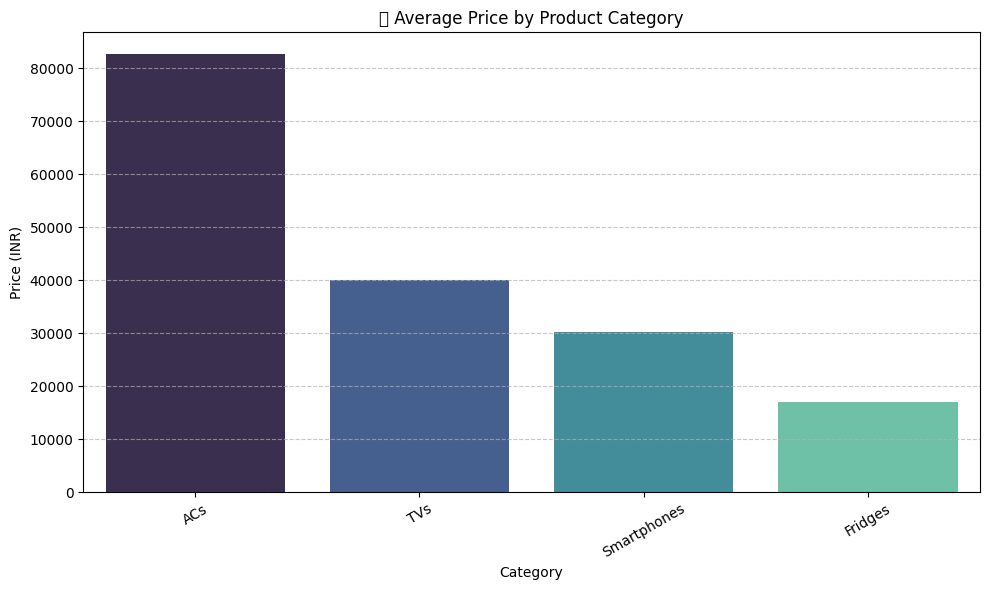

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='mako')
plt.title('📊 Average Price by Product Category')
plt.ylabel('Price (INR)')
plt.xlabel('Category')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Agnishwar Das\AppData\Local\Temp\ipykernel_9548\4192592121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clean_df, x='Category', y='Price', palette='pastel')
C:\Users\Agnishwar Das\AppData\Local\Temp\ipykernel_9548\4192592121.py:5: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Agnishwar Das\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


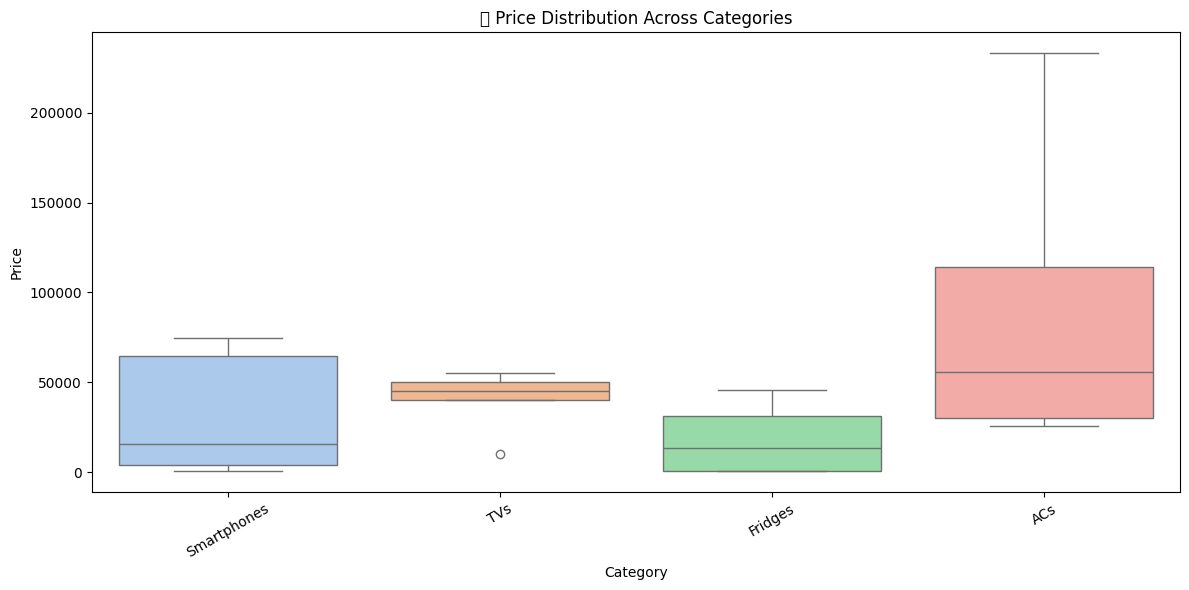

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='Category', y='Price', palette='pastel')
plt.title('💸 Price Distribution Across Categories')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Machine Learning

In [34]:
import pandas as pd

df = pd.read_csv("croma_cleaned_products.csv")
df.head()


,Category,Product,Price,URL
0,Smartphones,"vivo Y29 5G (6GB RAM, 128GB, Diamond Black)",15499,https://www.croma.com/vivo-y29-5g-6gb-ram-128g...
1,Smartphones,noise ColorFit Victor Smartwatch with Bluetoot...,999,https://www.croma.com/noise-colorfit-victor-sm...
2,Smartphones,"vivo Y29 5G (4GB RAM, 128GB, Glacier Blue)",13999,https://www.croma.com/vivo-y29-5g-4gb-ram-128g...
3,Smartphones,"vivo Y29 5G (4GB RAM, 128GB, Diamond Black)",13999,https://www.croma.com/vivo-y29-5g-4gb-ram-128g...
4,Smartphones,"vivo Y29 5G (6GB RAM, 128GB, Glacier Blue)",15499,https://www.croma.com/vivo-y29-5g-6gb-ram-128g...


In [36]:
# Optional: Extract brand from title if not in a separate column
df['Brand'] = df['Product'].str.split().str[0]  # crude method

# Keep only useful columns
df = df[['Category', 'Product', 'Brand', 'Price']]


In [38]:
df

,Category,Product,Brand,Price
0,Smartphones,"vivo Y29 5G (6GB RAM, 128GB, Diamond Black)",vivo,15499
1,Smartphones,noise ColorFit Victor Smartwatch with Bluetoot...,noise,999
2,Smartphones,"vivo Y29 5G (4GB RAM, 128GB, Glacier Blue)",vivo,13999
3,Smartphones,"vivo Y29 5G (4GB RAM, 128GB, Diamond Black)",vivo,13999
4,Smartphones,"vivo Y29 5G (6GB RAM, 128GB, Glacier Blue)",vivo,15499
...,...,...,...,...
63,ACs,"Apple MacBook Air (13.6 inch, M3, 16GB, 256GB,...",Apple,103994
64,ACs,HP 15s-fr5009TU Intel Core i3 12th Gen Laptop ...,HP,36490
65,ACs,"Xiaomi Pad 7 Wi-Fi Android Tablet (11.16 Inch,...",Xiaomi,26999
66,ACs,acer Aspire 3 A325-45 Intel Celeron N4500 Thin...,acer,25990


In [40]:
from sklearn.model_selection import train_test_split

X = df[['Category', 'Product', 'Brand']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random Forest

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor

# Text processing for product titles
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Category', 'Brand']),
    ('title', TfidfVectorizer(max_features=100), 'Product')
])

model = Pipeline([
    ('features', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [45]:
model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import mean_absolute_error, r2_score

preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))
print("R2 Score:", r2_score(y_test, preds))


MAE: 7564.169523809525
R2 Score: 0.8985925406361925


In [47]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 7564.169523809525
RMSE: 10748.452689281035
R² Score: 0.8985925406361925


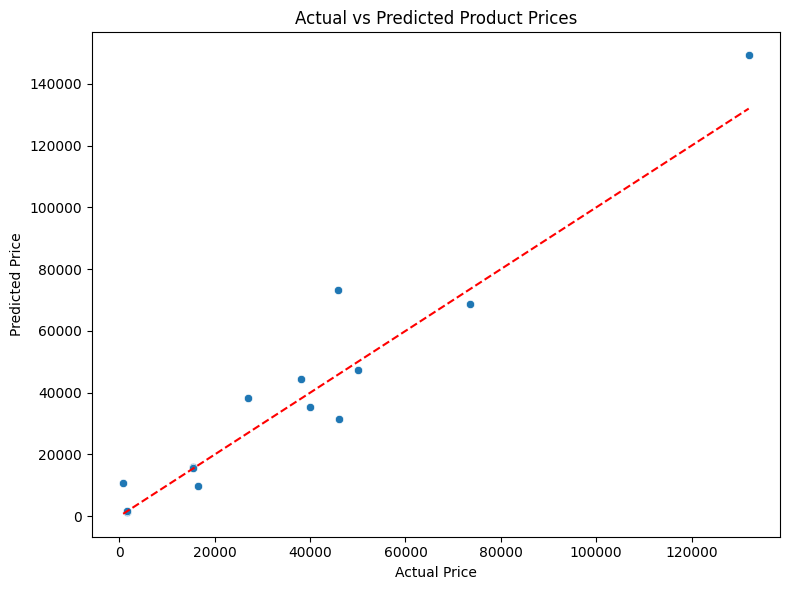

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Product Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()


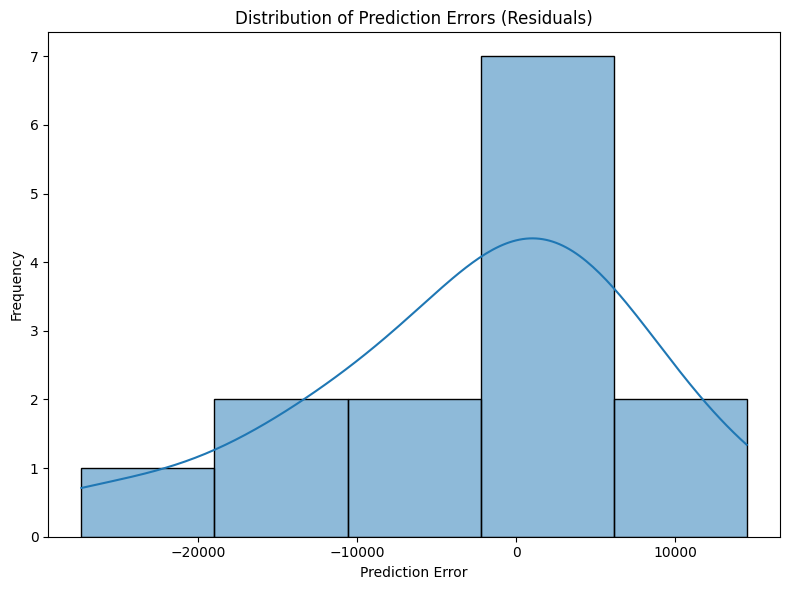

In [53]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing: encode category + brand, vectorize product name
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Category', 'Brand']),
    ('title', TfidfVectorizer(max_features=100), 'Product')
])

# Gradient Boosting pipeline
model = Pipeline([
    ('features', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42))
])


In [60]:
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R² Score:", r2)


MAE: 6483.720171045234
R² Score: 0.9088444270558291


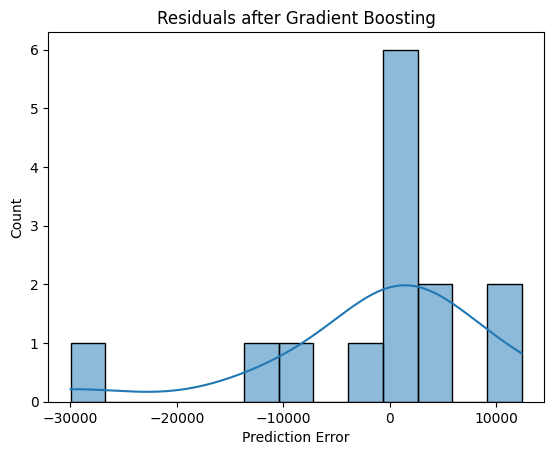

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals after Gradient Boosting")
plt.xlabel("Prediction Error")
plt.show()


In [64]:
# Create a DataFrame comparing actual and predicted values
results = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred.round(2),
    'Error': (y_test.values - y_pred.round(2)).round(2)
})

# Show top 10 rows
results.head(10)


,Actual Price,Predicted Price,Error
0,45990,33584.91,12405.09
1,1499,1359.05,139.95
2,15499,14007.83,1491.17
3,45790,56016.54,-10226.54
4,799,11689.76,-10890.76
5,16590,12473.08,4116.92
6,37990,36118.92,1871.08
7,73590,72410.45,1179.55
8,39999,28200.28,11798.72
9,1599,1321.05,277.95


In [66]:
# Sample products for testing
sample_data = pd.DataFrame({
    'Category': ['Smartphones', 'Laptops', 'TVs'],
    'Brand': ['Samsung', 'HP', 'Sony'],
    'Product': [
        'Samsung Galaxy A15 5G (6GB RAM, 128GB, Black)',
        'HP Victus Gaming Laptop (Intel i5, 16GB RAM, 512GB SSD)',
        'Sony Bravia 55 inch 4K Ultra HD Smart LED TV'
    ]
})


In [68]:
# Predict price for new products
sample_predictions = model.predict(sample_data)

# Add predictions to the DataFrame
sample_data['Predicted Price (₹)'] = sample_predictions.round(2)

sample_data


,Category,Brand,Product,Predicted Price (₹)
0,Smartphones,Samsung,"Samsung Galaxy A15 5G (6GB RAM, 128GB, Black)",14385.57
1,Laptops,HP,"HP Victus Gaming Laptop (Intel i5, 16GB RAM, 5...",45717.03
2,TVs,Sony,Sony Bravia 55 inch 4K Ultra HD Smart LED TV,21920.65


In [70]:
import joblib

# Save the model pipeline to a .pkl file
joblib.dump(model, "price_predictor_model.pkl")

print("✅ Model saved as price_predictor_model.pkl")


✅ Model saved as price_predictor_model.pkl
